In [16]:
import sys # in order to import QLearning* modules
sys.path.append('../..')

import numpy as np
import matplotlib.pyplot as plt
import logging
from QLearningBoltzmann import QLearningBoltzmann as boltz
from QLearningEGreedy import QLearningEGreedy as egreedy
from QLearningUCB import QLearningUCB as ucb
import pandas as pd
import seaborn as sns
import scipy.stats as st
from pathlib import Path

from threading import Thread
from threading import RLock as lock
import time

In [17]:
home = str(Path.home())

f_csma_list = [
    home + "/UFMG/SOMAC-ML/data/_BKP/29092018/csma/round2/backlog_file.npy", # RUN
    home + "/UFMG/SOMAC-ML/data/10102018/round1/csma/backlog_file.npy",      # RUN3
    home + "/UFMG/SOMAC-ML/data/06102018/run4/5/csma/backlog_file.npy",      # RUN4
    home + "/UFMG/SOMAC-ML/data/16102018/csma/csma/backlog_file.npy",        # RUN2 (CSMA)
    home + "/UFMG/SOMAC-ML/data/16102018/tdma/csma/backlog_file.npy"         # RUN2 (TDMA)
]

f_tdma_list = [
    home + "/UFMG/SOMAC-ML/data/_BKP/29092018/tdma/round2/backlog_file.npy", # RUN
    home + "/UFMG/SOMAC-ML/data/10102018/round1/tdma/backlog_file.npy",      # RUN3
    home + "/UFMG/SOMAC-ML/data/06102018/run4/5/tdma/backlog_file.npy",      # RUN4
    home + "/UFMG/SOMAC-ML/data/16102018/csma/tdma/backlog_file.npy",        # RUN2 (CSMA)
    home + "/UFMG/SOMAC-ML/data/16102018/tdma/tdma/backlog_file.npy"         # RUN2 (TDMA)
]

f_csma_list = [home + "/UFMG/SOMAC-ML/data/06112018/round1/csma/backlog_file.npy"]
f_tdma_list = [home + "/UFMG/SOMAC-ML/data/06112018/round1/tdma/backlog_file.npy"]

In [18]:
def plot(f_csma, f_tdma, fig_name):
    
    dic_csma = np.load(f_csma, encoding = "latin1").item()
    dic_tdma = np.load(f_tdma, encoding = "latin1").item()
    
    n = np.min([len(dic_csma), len(dic_tdma)])
    
    t_csma = [dic_csma[t]["metrics"][0, 1] for t in range(n)]
    t_tdma = [dic_tdma[t]["metrics"][0, 1] for t in range(n)]
    
    norm = np.max([np.max(t_csma), np.max(t_tdma)])
    
    t_csma = np.array(t_csma) * 100. / norm
    t_tdma = np.array(t_tdma) * 100. / norm
    
    m_size = 5
    
    tsteps = np.arange(n)
    plt.plot(tsteps, t_csma, marker = "x", markersize = m_size)
    plt.plot(tsteps, t_tdma, marker = "s", markersize = m_size)
    
    plt.legend(["CSMA", "TDMA"], loc = "lower right")
    plt.xlabel("Tempo (min)"); plt.ylabel("Vazão (%)")
    
    plt.grid(True)
    plt.savefig(fig_name, bbox_inches = 'tight', pad_inches = 0)
    plt.plot()
    plt.show()
    #plt.clf()
    
    return

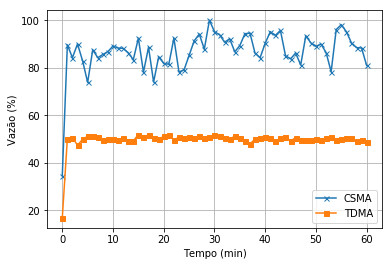

In [20]:
scenario = 3

for f_csma, f_tdma in zip(f_csma_list, f_tdma_list):
    
    fig_name = "../graphs/scenario_{}.pdf".format(scenario)
    
    plot(f_csma, f_tdma, fig_name)
    
    scenario = scenario + 1